In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Loading and Cleaning the Data

In [20]:
mouse_plank = pd.read_csv("mouse_plank.csv")

In [21]:
mouse_plank.head()

,Mouse ID,Date,Trial,Transit Time (s),Footfall Errors,Head Dips,Notes
0,6566,1/24/23,1,142,8,36,NaN
1,6570,1/24/23,1,91,0,17,NaN
2,6570,1/27/23,2,19,0,0,NaN
3,6570,1/27/23,3,120,6,23,mouse ends up at the start
4,6572,1/27/23,1,129,24,22,NaN


In [22]:
mouse_plank[["Transit Time (s)", "Footfall Errors"]].describe()

,Transit Time (s),Footfall Errors
count,58.000000,58.000000
mean,49.034483,3.568966
std,44.423783,3.996104
min,9.000000,0.000000
25%,18.250000,1.000000
50%,30.000000,2.000000
75%,67.500000,6.000000
max,194.000000,24.000000


In [23]:
def label_compression(row):
    if(row["Mouse ID"] in [6604, 6570, 6572, 6567, 6568, 6600, 7115]):
        return "Fast"
    elif(row["Mouse ID"] in [6566, 6601, 6599, 7059, 7067]):
        return "Slow"
    elif(row["Mouse ID"] == 6604):
        return "Neg control"

In [24]:
mouse_plank["Compression"] = mouse_plank.apply(label_compression, axis = 1)

In [36]:
mouse_plank.head()

,Mouse ID,Date,Trial,Transit Time (s),Footfall Errors,Head Dips,Notes,Compression
0,6566,1/24/23,1,142,8,36,NaN,Slow
1,6570,1/24/23,1,91,0,17,NaN,Fast
2,6570,1/27/23,2,19,0,0,NaN,Fast
3,6570,1/27/23,3,120,6,23,mouse ends up at the start,Fast
4,6572,1/27/23,1,129,24,22,NaN,Fast


## Univariate Analysis

Text(10.142716049382715, 0.5, 'Count')

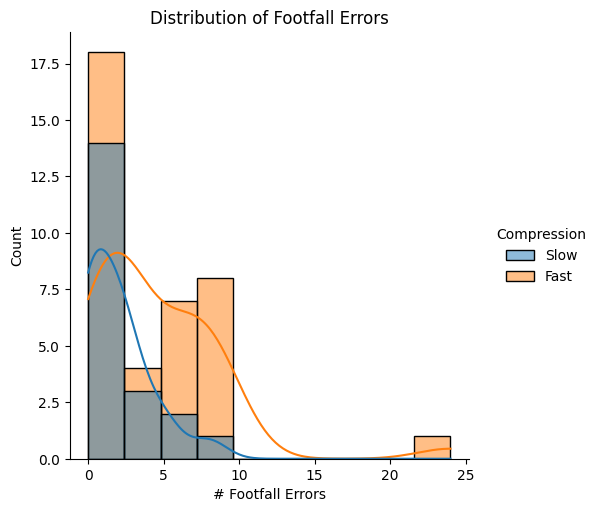

In [25]:
sns.displot(data = mouse_plank, x = "Footfall Errors", hue = "Compression", kde = True)
plt.title("Distribution of Footfall Errors")
plt.xlabel("# Footfall Errors")
plt.ylabel("Count")

Text(10.142716049382715, 0.5, 'Count')

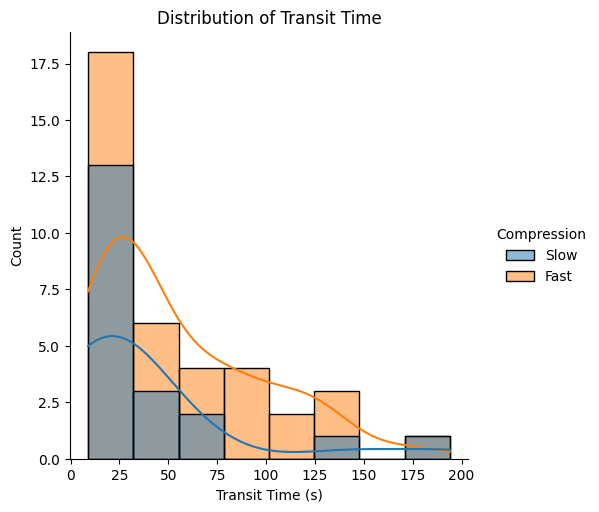

In [26]:
sns.displot(data = mouse_plank, x = "Transit Time (s)", hue = "Compression", kde = True)
plt.title("Distribution of Transit Time")
plt.xlabel("Transit Time (s)")
plt.ylabel("Count")

Text(10.142716049382715, 0.5, 'Count')

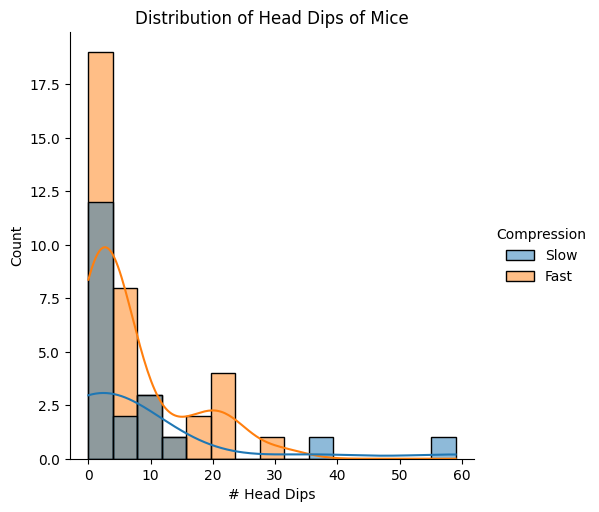

In [27]:
sns.displot(data = mouse_plank, x = "Head Dips", hue = "Compression", kde = True)
plt.title("Distribution of Head Dips of Mice")
plt.xlabel("# Head Dips")
plt.ylabel("Count")

Text(13.819444444444445, 0.5, 'Count')

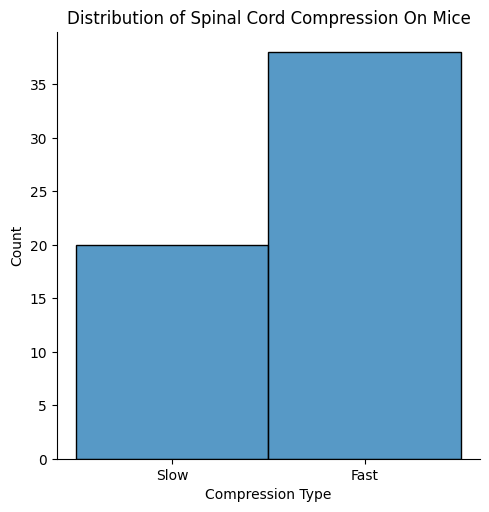

In [28]:
sns.displot(data = mouse_plank, x = "Compression")
plt.title("Distribution of Spinal Cord Compression On Mice")
plt.xlabel("Compression Type")
plt.ylabel("Count")

## Multivariate Analysis

<Axes: >

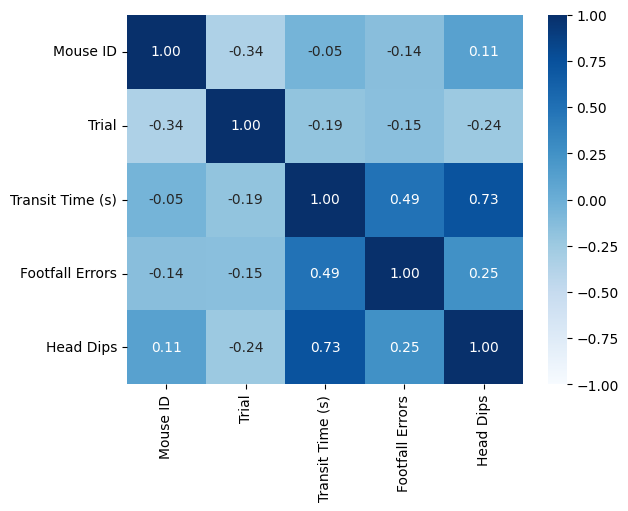

In [31]:
sns.heatmap(mouse_plank.select_dtypes(include=np.number).corr(), annot=True, vmin=-1, fmt=".2f", cmap = "Blues")

In [ ]:
#plt.scatter(mouse_plank["Trial"], mouse_plank["Footfall Errors"])
sns.lmplot(x = "Trial", y="Footfall Errors", data=mouse_plank)
plt.title("Number of Footfall Errors Over Trials")
plt.ylim(0, 15)
plt.xlabel("Trial Number")
plt.ylabel("Footfall Errors")
sns.lmplot(x = "Trial", y="Footfall Errors", hue = "Compression", data=mouse_plank)
plt.show()

In [ ]:
sns.lmplot(x = "Trial", y="Transit Time (s)", data=mouse_plank)
plt.title("Time of Transit Over Trials")
plt.xlabel("Trial Number")
plt.ylabel("Transit Time (s)")
plt.show()

In [ ]:
sns.lmplot(x = "Trial", y="Transit Time (s)", data=mouse_plank)
plt.xlabel("Trial Number")
plt.ylabel("Transit Time (s)")
plt.title("Time of Transit Over Trials (For Times Under 100s)")

# Focus on transit times under 100 seconds
plt.ylim(0, 100)

sns.lmplot(x = "Trial", y="Transit Time (s)", hue = "Compression", data=mouse_plank)
plt.show()

In [ ]:
plt.scatter(mouse_plank["Trial"], mouse_plank["Transit Time (s)"], 
            c = mouse_plank["Mouse ID"], cmap = "viridis")

In [ ]:
sns.lmplot(x = "Footfall Errors", y="Transit Time (s)", data=mouse_plank)
plt.title("Transit Time Increases With Footfall Errors")
plt.show()

In [ ]:
sns.lmplot(x = "Footfall Errors", y="Transit Time (s)", data=mouse_plank)
plt.title("Transit Time Increases With Footfall Errors (For Times Under 15s)")
plt.xlim(0, 15)
sns.lmplot(x = "Footfall Errors", y="Transit Time (s)", hue = "Compression", data=mouse_plank)
plt.show()

In [ ]:
sns.lmplot(x = "Head Dips", y="Transit Time (s)", data=mouse_plank)
sns.lmplot(x = "Head Dips", y="Transit Time (s)", hue = "Compression", data=mouse_plank)
plt.title("Transit Time Increases With Head Dips")
plt.show()

Text(0.5, 1.0, 'Footfall Errors Increases With Head Dips')

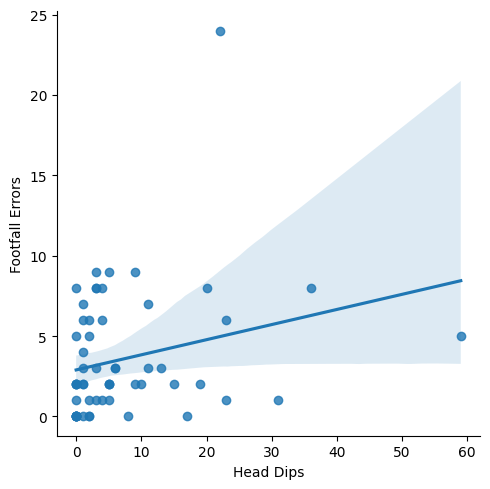

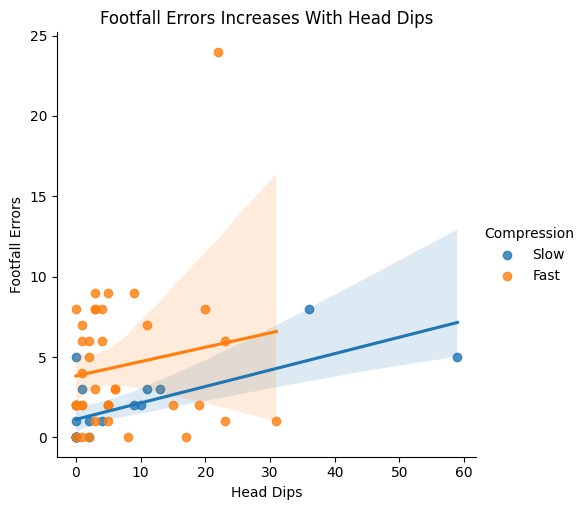

In [19]:
sns.lmplot(x = "Head Dips", y="Footfall Errors", data=mouse_plank)
sns.lmplot(x = "Head Dips", y="Footfall Errors", hue = "Compression", data=mouse_plank)
plt.title("Footfall Errors Increases With Head Dips")
plt.show()

## Linear Regression

In [38]:
compression_dummies = pd.get_dummies(mouse_plank["Compression"]).iloc[:,0]

In [45]:
compression_df = pd.concat([mouse_plank, compression_dummies], axis = 1)
compression_df = compression_df.drop("Compression", axis = 1)
compression_df["Fast"] = compression_df["Fast"].astype(int)
compression_df = compression_df.rename(columns = {"Fast":"Compression"})
compression_df.head()

,Mouse ID,Date,Trial,Transit Time (s),Footfall Errors,Head Dips,Notes,Compression
0,6566,1/24/23,1,142,8,36,NaN,0
1,6570,1/24/23,1,91,0,17,NaN,1
2,6570,1/27/23,2,19,0,0,NaN,1
3,6570,1/27/23,3,120,6,23,mouse ends up at the start,1
4,6572,1/27/23,1,129,24,22,NaN,1


In [47]:
# in progress: using Scikit-Learn to create a linear model